<a href="https://colab.research.google.com/github/marsavil/Data_Science_Notebooks/blob/main/7_IA_aumentada_previsi%C3%B3n_de_atrasos_de_vuelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IA aumentada: previsión de atrasos de vuelos

En este curso, vamos a aprender cómo construir un modelo de regresión para predecir los retrasos en vuelos. Para ello, utilizaremos las bibliotecas Pandas, NumPy, scikit-learn, Seaborn y Yellowbrick

## 1 - Exploración de los datos

In [7]:
# VS CODE

# import importlib
# import subprocess
# import sys
# import os

# def instalar_si_falta(paquete, import_name=None):
#     try:
#         importlib.import_module(import_name or paquete)
#     except ImportError:
#         print(f"Instalando {paquete}...")
#         subprocess.check_call([sys.executable, "-m", "pip", "install", paquete])

#         # Luego de instalar, agregamos el paquete a requirements.txt si no está
#         try:
#             # Obtenemos la versión instalada
#             result = subprocess.check_output([sys.executable, "-m", "pip", "show", paquete], text=True)
#             version_line = next((line for line in result.splitlines() if line.startswith("Version: ")), None)
#             version = version_line.split(" ")[1] if version_line else ""

#             # Formato a agregar
#             linea_nueva = f"{paquete}=={version}"

#             # Chequeamos si ya existe en requirements.txt
#             if os.path.exists("requirements.txt"):
#                 with open("requirements.txt", "r") as f:
#                     contenido = f.read()
#                 if paquete not in contenido:
#                     with open("requirements.txt", "a") as f:
#                         f.write(f"\n{linea_nueva}")
#                     print(f"{paquete} agregado a requirements.txt")
#             else:
#                 # Si no existe, lo creamos
#                 with open("requirements.txt", "w") as f:
#                     f.write(linea_nueva)
#                 print("Archivo requirements.txt creado")

#         except Exception as e:

# paquete = ['numpy', 'pandas', 'sklearn', 'seaborn', 'yellowbrick']
# import_name = ['np', 'pd', 'sk', 'sns', 'yb']

# for i in range(len(paquete)):
#     instalar_si_falta(paquete[i], import_name[i])


In [129]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import yellowbrick as yb

import warnings

warnings.filterwarnings('ignore')

In [9]:
id = '1IgpFhPpO-8uEXCUd630stFXSW0gs4sCd'
url = f'https://drive.google.com/uc?export=download&id={id}'
df = pd.read_csv(url)
df.head(2)


,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609


In [10]:
df.shape

(71175, 11)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [12]:
df.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [13]:
df.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


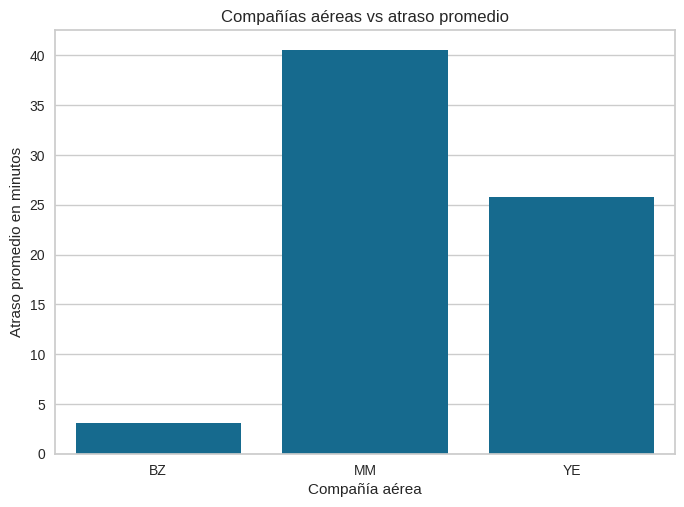

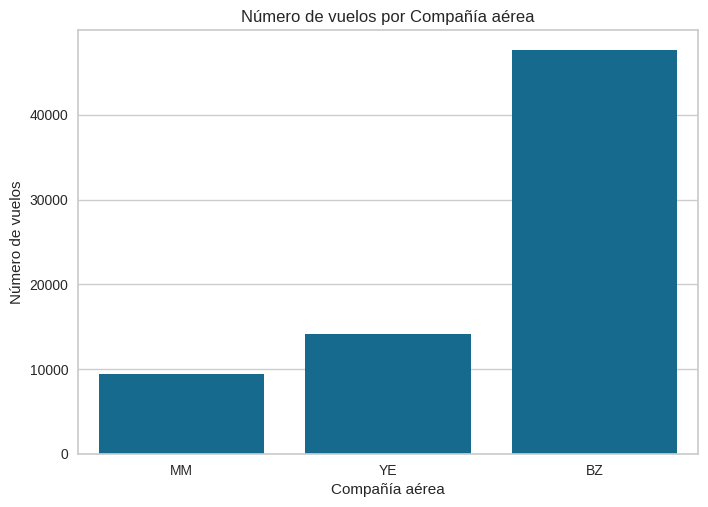

In [14]:
avg_delay = df.groupby('airline') ['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data=avg_delay)
plt.title('Compañías aéreas vs atraso promedio')
plt.xlabel('Compañía aérea')
plt.ylabel('Atraso promedio en minutos')
plt.show()


sns.countplot(data=df, x='airline')
plt.title('Número de vuelos por Compañía aérea')
plt.xlabel('Compañía aérea')
plt.ylabel('Número de vuelos')
plt.show()

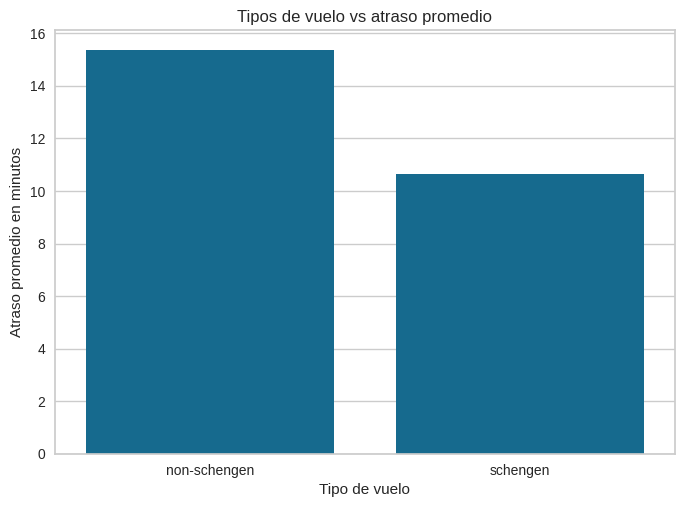

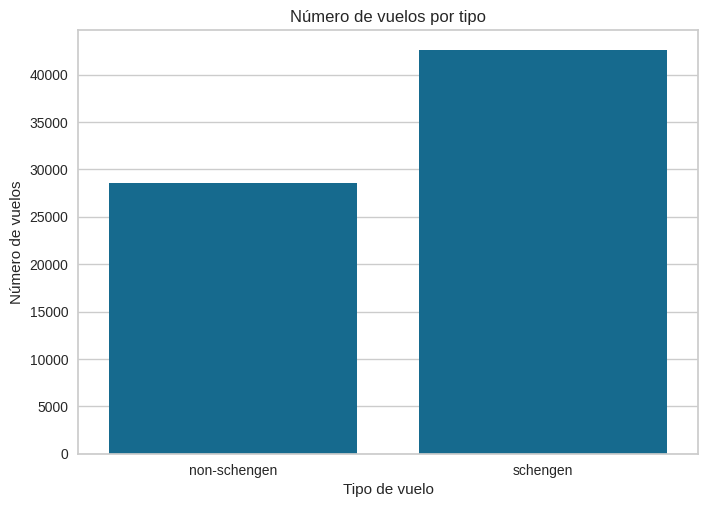

In [15]:
avg_delay = df.groupby('schengen') ['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data=avg_delay)
plt.title('Tipos de vuelo vs atraso promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Atraso promedio en minutos')
plt.show()


sns.countplot(data=df, x='schengen')
plt.title('Número de vuelos por tipo')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Número de vuelos')
plt.show()

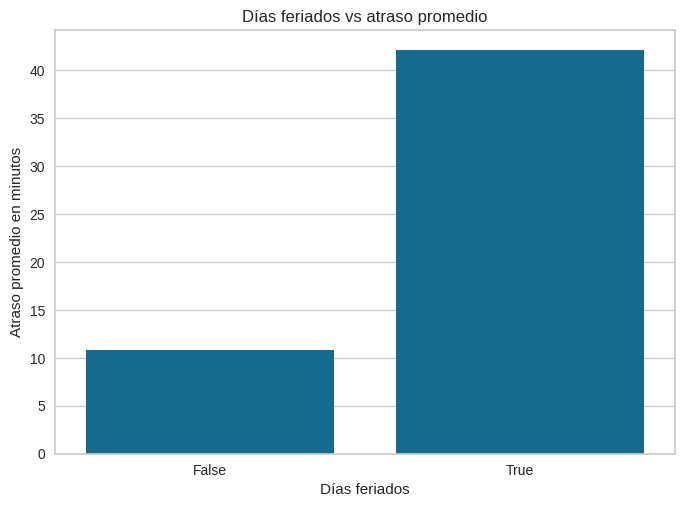

In [16]:
avg_delay = df.groupby('is_holiday') ['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data=avg_delay)
plt.title('Días feriados vs atraso promedio')
plt.xlabel('Días feriados')
plt.ylabel('Atraso promedio en minutos')
plt.show()

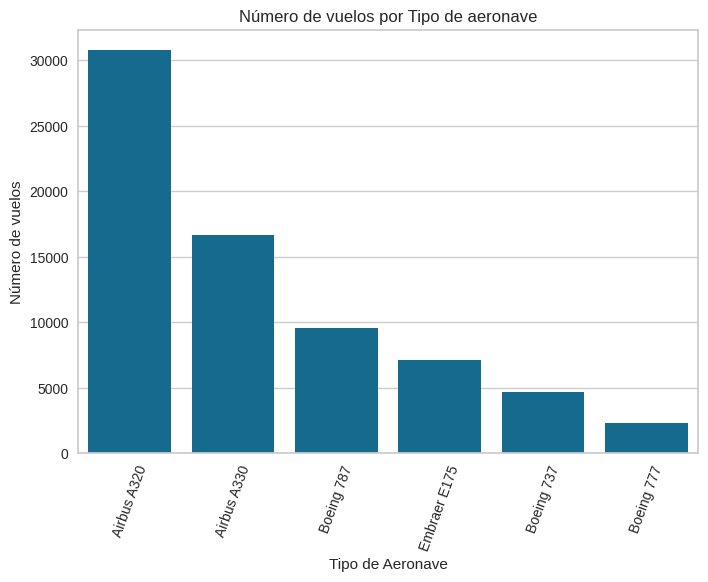

In [17]:
order = df ['aircraft_type'].value_counts().index
sns.countplot(data=df, x='aircraft_type', order=order)
plt.title('Número de vuelos por Tipo de aeronave')
plt.xticks (rotation=70)
plt.xlabel('Tipo de Aeronave')
plt.ylabel('Número de vuelos')
plt.show()

<Axes: xlabel='arrival_time', ylabel='Count'>

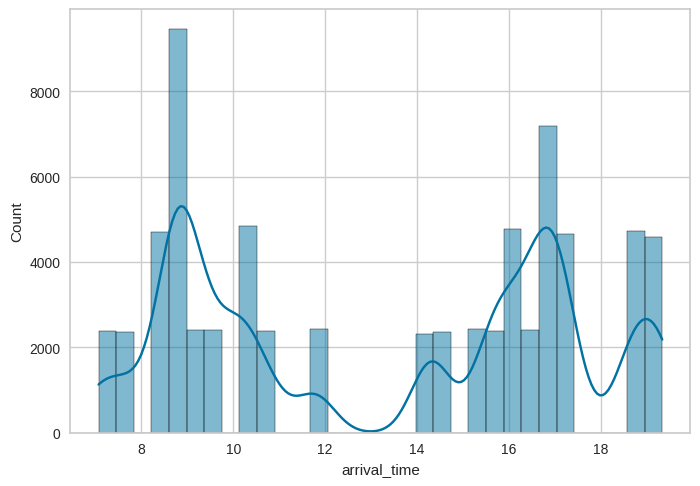

In [18]:
sns.histplot(data= df, x='arrival_time', kde=True)

In [19]:

def ancho_bin(df,columna):
  q75,q25 = np.percentile (df [columna], [75,25])
  iqr = q75-q25
  ancho = 2 * iqr * np.power(len (df[columna]), -1/3)
  return ancho

<Axes: xlabel='arrival_time', ylabel='Count'>

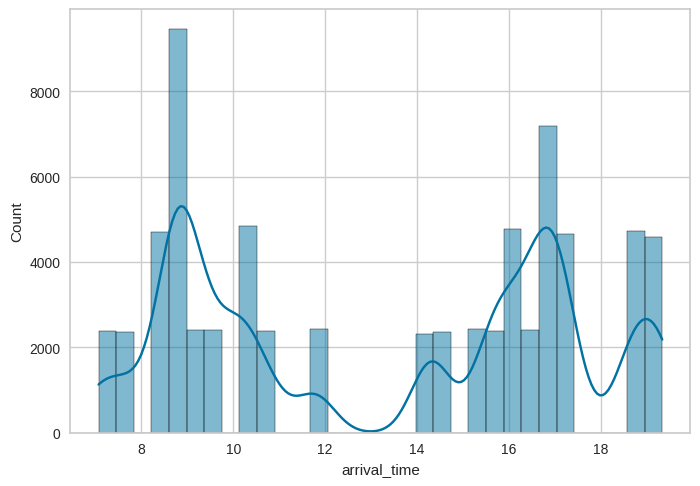

In [20]:
binwidth = ancho_bin(df, 'arrival_time')

sns.histplot(data= df, x='arrival_time', kde=True, binwidth=binwidth)
#sns.histplot(data= df, x='arrival_time', kde=True, bins=10)

<Axes: xlabel='departure_time', ylabel='Count'>

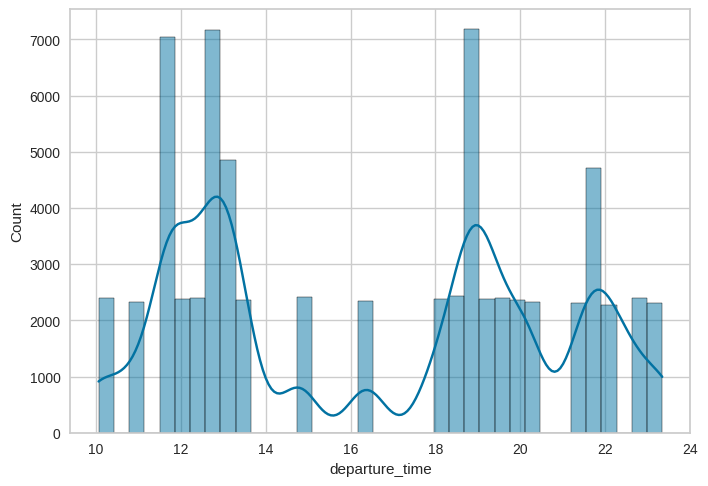

In [21]:
binwidth = ancho_bin(df, 'departure_time')

sns.histplot(data= df, x='departure_time', kde=True, binwidth=binwidth)

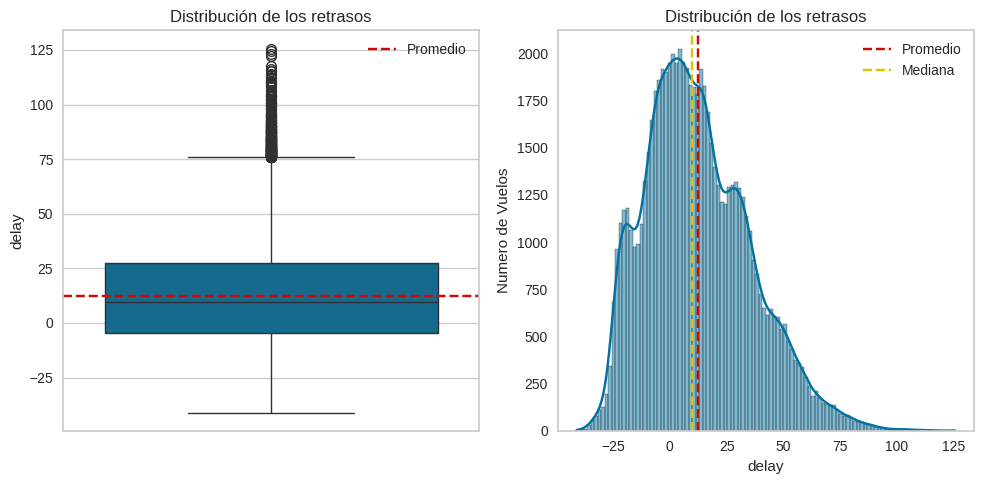

In [22]:
delay_mean = df['delay'].mean()
delay_median = df['delay'].median()

fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(df['delay'], ax=ax[0])
ax[0].set_title('Distribución de los retrasos')
ax[0].axhline(y=delay_mean, color='r', linestyle='--', label='Promedio')
ax[0].legend()

binwidth = ancho_bin(df, 'delay')
sns.histplot(data=df, x='delay', kde=True, binwidth=binwidth, ax=ax[1])
ax[1].set_title('Distribución de los retrasos')
plt.ylabel('Numero de Vuelos')
plt.grid(False)
ax[1].axvline(x=delay_mean, color='r', linestyle='--', label='Promedio')
ax[1].axvline(x=delay_median, color='y', linestyle='--', label='Mediana')
ax[1].legend()

plt.tight_layout()
plt.show()

## 2 - Ingenieria de Atributos (Feature Engineering)

In [23]:
df.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [24]:
df['date'] = df['year'].astype(str) +  '-' + (df['day']+1).astype(str)
df['date'] = pd.to_datetime(df['date'], format='%Y-%j')
df.tail(2)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648,2022-12-31


In [25]:
df['is_weekend'] = df['date'].dt.weekday.isin([5,6])
df.head(2)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False


In [26]:
df['day_name'] = df['date'].dt.day_name()
df.head(2)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False,Friday
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False,Friday


### Codificación de datos

Los modelos de Machine Learning funcionan mejor cuando tenemos los datos codificados, es decir, variables numéricas

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  object        
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  bool          
 10  delay           71175 non-null  float64       
 11  date            71175 non-null  datetime64[ns]
 12  is_weekend      71175 non-null  bool          
 13  day_name        71175 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), o

Tenemos, por ejemplo, la columna "Aerolínea", "Tipo de aeronave", "Espacio Schengen" y "Origen". Todas ellas son cadenas de caracteres que debemos codificar. También tenemos otras variables de tipo booleano, como IsWeekend y IsHoliday. Aunque "Schengen" es de tipo String (Objeto), solo tiene dos categorías: Schengen o no Schengen.

In [28]:
df['schengen'] = df['schengen'].replace({'schengen': 1, 'non-schengen': 0})
df.head(2)

/tmp/ipython-input-28-2750211188.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['schengen'] = df['schengen'].replace({'schengen': 1, 'non-schengen': 0})


,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,0,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False,Friday
1,10,YE,Airbus A320,0,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False,Friday


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  int64         
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  bool          
 10  delay           71175 non-null  float64       
 11  date            71175 non-null  datetime64[ns]
 12  is_weekend      71175 non-null  bool          
 13  day_name        71175 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(4), o

In [30]:
df['is_holiday'] = df['is_holiday'].replace({True: 1, False: 0})
df['is_weekend'] = df['is_weekend'].replace({True: 1, False: 0})

/tmp/ipython-input-30-390831410.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_holiday'] = df['is_holiday'].replace({True: 1, False: 0})
/tmp/ipython-input-30-390831410.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_weekend'] = df['is_weekend'].replace({True: 1, False: 0})


df['is_holiday'] = df['is_holiday'].replace({True: 1, False: 0})
df['is_weekend'] = df['is_weekend'].replace({True: 1, False: 0})
df_encoded['is_holiday'] = df['is_holiday'].replace({True: 1, False: 0})
df_encoded['is_weekend'] = df['is_weekend'].replace({True: 1, False: 0})
df._info()

In [31]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Variables categóricas
categorical_vars = ['airline', 'aircraft_type', 'origin', 'day_name']

# Separar variables categóricas y numéricas
df_cat = df[categorical_vars]
df_rest = df.drop(columns=categorical_vars)

# Crear el codificador
encoder = OneHotEncoder(sparse_output=False, dtype=int, drop=None)


# Ajustar y transformar las variables categóricas
encoded_array = encoder.fit_transform(df_cat)

# Obtener los nombres de las nuevas columnas
encoded_col_names = encoder.get_feature_names_out(categorical_vars)

# Crear DataFrame codificado
df_encoded_cat = pd.DataFrame(encoded_array, columns=encoded_col_names, index=df.index)

# Unirlo con el resto del DataFrame original
df_encoded = pd.concat([df_rest, df_encoded_cat], axis=1)

df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   flight_id                   71175 non-null  int64         
 1   schengen                    71175 non-null  int64         
 2   arrival_time                71175 non-null  float64       
 3   departure_time              71175 non-null  float64       
 4   day                         71175 non-null  int64         
 5   year                        71175 non-null  int64         
 6   is_holiday                  71175 non-null  int64         
 7   delay                       71175 non-null  float64       
 8   date                        71175 non-null  datetime64[ns]
 9   is_weekend                  71175 non-null  int64         
 10  airline_BZ                  71175 non-null  int64         
 11  airline_MM                  71175 non-null  int64     

In [32]:
df_encoded['is_holiday'] = df_encoded['is_holiday'].replace({True: 1, False: 0})
df_encoded['is_weekend'] = df_encoded['is_weekend'].replace({True: 1, False: 0})

In [33]:
categoricas = ['airline', 'aircraft_type', 'day_name', 'origin']
pd.get_dummies(df, columns=categoricas, dtype=int).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   flight_id                   71175 non-null  int64         
 1   schengen                    71175 non-null  int64         
 2   arrival_time                71175 non-null  float64       
 3   departure_time              71175 non-null  float64       
 4   day                         71175 non-null  int64         
 5   year                        71175 non-null  int64         
 6   is_holiday                  71175 non-null  int64         
 7   delay                       71175 non-null  float64       
 8   date                        71175 non-null  datetime64[ns]
 9   is_weekend                  71175 non-null  int64         
 10  airline_BZ                  71175 non-null  int64         
 11  airline_MM                  71175 non-null  int64     

In [34]:
df_codificado = pd.get_dummies(df, columns=categoricas, dtype=int)
df_codificado.head(2)


,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Boeing 737,aircraft_type_Boeing 777,aircraft_type_Boeing 787,aircraft_type_Embraer E175,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,origin_AUZ,origin_CNU,origin_CSF,origin_EMM,origin_FJB,origin_MWL,origin_PUA,origin_TCY,origin_TZF,origin_ZQO
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Hay casos en los cuales las variables pueden tener comportamientos muy semejantes y pueden acabar perjudicando nuestro modelado.Como notamos en los gráficos, tanto el horario de llegada como el horario de salida tenían un comportamiento muy semejante.

In [35]:
df_codificado[['arrival_time', 'departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [36]:
df_encoded[['arrival_time', 'departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


Observamos que existe una correlación de casi 100%.

La correlación es muy fuerte. El hecho de incluir estas dos variables puede sesgar nuestro modelo. Debemos escoger solo una de ellas. También vamos a eliminar variable que no nos serán útiles

In [37]:
df_codificado = df_codificado.drop(columns=['flight_id', 'day', 'year', 'date', 'departure_time'] )
df_encoded = df_encoded.drop(columns=['flight_id', 'day', 'year', 'date', 'departure_time'] )

In [38]:
df_codificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   schengen                    71175 non-null  int64  
 1   arrival_time                71175 non-null  float64
 2   is_holiday                  71175 non-null  int64  
 3   delay                       71175 non-null  float64
 4   is_weekend                  71175 non-null  int64  
 5   airline_BZ                  71175 non-null  int64  
 6   airline_MM                  71175 non-null  int64  
 7   airline_YE                  71175 non-null  int64  
 8   aircraft_type_Airbus A320   71175 non-null  int64  
 9   aircraft_type_Airbus A330   71175 non-null  int64  
 10  aircraft_type_Boeing 737    71175 non-null  int64  
 11  aircraft_type_Boeing 777    71175 non-null  int64  
 12  aircraft_type_Boeing 787    71175 non-null  int64  
 13  aircraft_type_Embraer E175  711

In [39]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   schengen                    71175 non-null  int64  
 1   arrival_time                71175 non-null  float64
 2   is_holiday                  71175 non-null  int64  
 3   delay                       71175 non-null  float64
 4   is_weekend                  71175 non-null  int64  
 5   airline_BZ                  71175 non-null  int64  
 6   airline_MM                  71175 non-null  int64  
 7   airline_YE                  71175 non-null  int64  
 8   aircraft_type_Airbus A320   71175 non-null  int64  
 9   aircraft_type_Airbus A330   71175 non-null  int64  
 10  aircraft_type_Boeing 737    71175 non-null  int64  
 11  aircraft_type_Boeing 777    71175 non-null  int64  
 12  aircraft_type_Boeing 787    71175 non-null  int64  
 13  aircraft_type_Embraer E175  711

## 3 - Selección y Validación del Modelo

Vamos a crear una Baseline. Para esta Baseline, no es necesario que sea el mejor modelo; podemos crear un modelo dummy (básico), que no generaliza muy bien.

Para ello, utilizaremos DummyRegressor de sklearn.dummy. Este regresor realiza la regresión de manera básica. También utilizaremos train_test_split de sklearn.model_selection, que nos permitirá separar nuestro DataFrame en datos de prueba y datos de entrenamiento.

In [40]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

In [41]:
X = df_codificado.drop(columns=['delay'])
y = df_codificado['delay']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
Baseline = DummyRegressor()
Baseline.fit(X_train, y_train)

DummyRegressor()

Importaremos de sklearn.metrics las métricas mean_squared_error, mean_absolute_error y r2_score. Estas métricas nos permitirán medir el error de nuestro modelo. El coeficiente de determinación (r2_score) es especialmente importante, ya que indica qué tanto las variables independientes logran explicar la variable de respuesta.

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [45]:
y_predict_dummy = Baseline.predict(X_test)

In [49]:
def calcular_regresion(y_test, y_predict):
    mse = mean_squared_error(y_test, y_predict)
    mae = mean_absolute_error(y_test, y_predict)
    r2 = r2_score(y_test, y_predict)
    metrics = {
        'RMSE' : round(mse**(1/2),4), # Esto es porque necesitamos que no muestre los minutos al cuadrado. Refinamos esto colocando la multiplicación internamente para sacar la raíz cuadrada en este punto
        'MAE' : round(mae, 4),
        'R2' : round(r2, 4)
    }
    return metrics


In [50]:
resulutados_baseline = calcular_regresion(y_test, y_predict_dummy)
resulutados_baseline

{'RMSE': 23.1612, 'MAE': 18.5646, 'R2': -0.0}

Ya hemos establecido una línea base (Baseline), utilizando un DummyRegressor. La idea era que generalizara de la manera menos inteligente posible para que pudiéramos mejorar nuestro modelo. Esto es completamente válido y normal al trabajar con Machine Learning: siempre establecemos una línea base y, a partir de ahí, comenzamos a mejorar.

Para nuestro problema, utilizaremos bosques aleatorios, conocidos como Random Forest, que es un modelo más robusto y con el cual mejoraremos considerablemente el resultado de nuestra línea base. Importamos el RandomForestRegressor de sklearn.ensemble.

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
modelo = RandomForestRegressor(max_depth=5, random_state=42)
modelo.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [54]:
y_predict = modelo.predict(X_test)

In [55]:
resultados_modelo = calcular_regresion(y_test, y_predict)
resultados_modelo

{'RMSE': 13.7479, 'MAE': 11.0262, 'R2': 0.6477}

Para visualizar estos resultados de manera gráfica, utilizaremos la biblioteca Yellowbrick. Vamos a ver un Error Plot que nos permite observar gráficamente cómo está generalizando nuestro modelo.

In [72]:
from yellowbrick.regressor import  PredictionError, residuals_plot

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


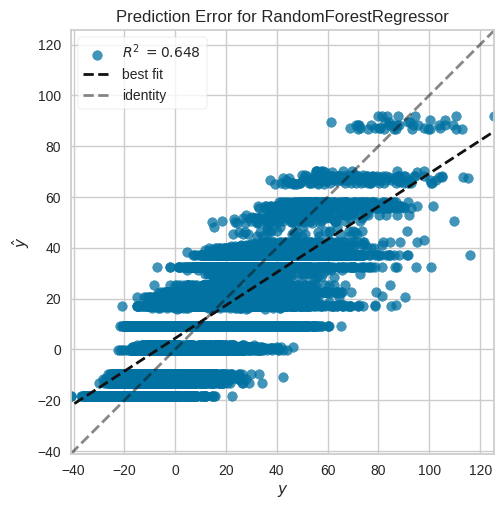

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [68]:
Visualizer = PredictionError(modelo)
Visualizer.fit(X_train, y_train)
Visualizer.score(X_test, y_test)
Visualizer.show()

La predicción de error para este regresor de Random Forest muestra que el mejor ajuste está representado por la línea negra. La línea de identidad, que es nuestra gráfica de identidad del modelo, es la que se muestra en color gris.

Además, tenemos un gráfico que nos permite ver los residuos, es decir, cuánto realmente está generalizando nuestro modelo.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


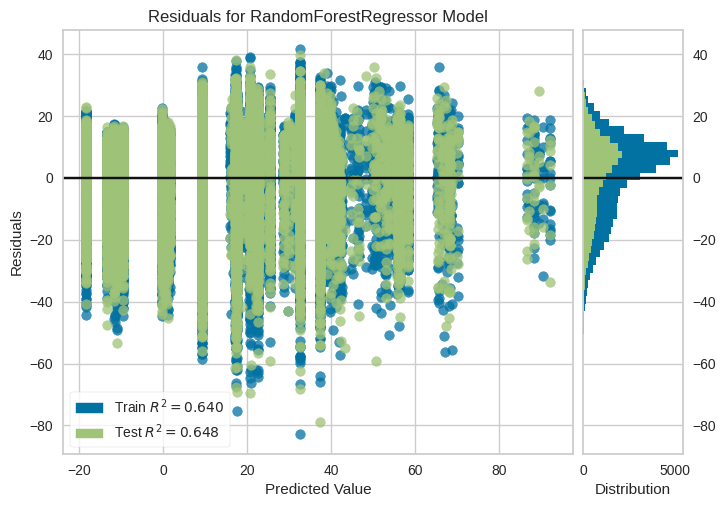

In [75]:
Visualizer = residuals_plot(modelo, X_train, y_train, X_test, y_test);


Observamos que el comportamiento de prueba fue muy cercano al de entrenamiento. La idea de observar esta distribución es que, aunque el coeficiente de determinación del entrenamiento fue del 64%, al probarlo, llegó casi al 65%.

Esto indica que el modelo está generalizando relativamente bien sin mejoras adicionales, ajustes de hiperparámetros o refinamientos. Sin embargo, no es suficiente

### Validación cruzada

Como no sabemos si nuestro modelo está generalizando adecuadamente con cualquier combinación de datos de entrenamiento y prueba, vamos a  realizar una validación cruzada que es precisamente dividir nuestro conjunto de datos en varias partes y tomar diferentes secciones de este conjunto para entrenar y probar.

In [77]:
from sklearn.model_selection import KFold, cross_validate

In [79]:
scoring = {
    'RMSE' : 'neg_root_mean_squared_error',
    'MAE' : 'neg_mean_absolute_error',
    'R2' : 'r2'
}

In [80]:
cross_validation = KFold(n_splits=5, shuffle=True, random_state=42)
cross_validation_results = cross_validate(modelo, X_train, y_train, cv=cross_validation, scoring=scoring)
cross_validation_results


{'fit_time': array([6.02317452, 3.30534148, 3.78701234, 3.79029846, 3.2432673 ]),
 'score_time': array([0.05489039, 0.05737877, 0.09899759, 0.05830193, 0.05731177]),
 'test_RMSE': array([-13.76989748, -13.86928373, -13.96807668, -13.85347402,
        -13.98953528]),
 'test_MAE': array([-11.03252135, -11.13534968, -11.2094657 , -11.14503717,
        -11.25775565]),
 'test_R2': array([0.64559466, 0.63745663, 0.63523823, 0.64089302, 0.63441267])}

Vemos que hay consistencia en los resutados porque son coherentes con los arrojado anteriormente por los resultados del modelo.

In [81]:
resultados_modelo

{'RMSE': 13.7479, 'MAE': 11.0262, 'R2': 0.6477}

## 4 - Optimización de Hiperparámetros

In [82]:
len(df_codificado.columns) # Exploramos la cantidad de columnas (Variables) de nuestro data frame

31

In [84]:
importances = modelo.feature_importances_  # Exploramos la importancia de cada variable para nuestro modelo
importances

array([1.99196613e-06, 3.60927296e-02, 1.45895991e-01, 6.10861947e-05,
       5.30319673e-01, 1.61886197e-05, 1.94686882e-05, 1.00738082e-01,
       5.76166993e-02, 5.20042050e-04, 1.47076405e-04, 2.51413402e-02,
       4.58903210e-02, 8.68597522e-04, 1.00052465e-04, 2.79146627e-05,
       7.17673254e-05, 3.72705034e-05, 1.06499638e-04, 8.71862374e-05,
       1.01922847e-04, 1.61962942e-04, 1.52755441e-02, 3.12140030e-05,
       1.11614587e-04, 5.77486361e-04, 1.03561136e-02, 2.22144128e-02,
       7.19975466e-03, 2.09996685e-04])

In [87]:
# creamos un data frame para identificar las features y las ordenamos según su importancia para el modelo

feature_importances = pd.DataFrame({'feature': X.columns, 'importance': ((importances)*100).round(2)}).sort_values('importance', ascending=False)
feature_importances

,feature,importance
4,airline_BZ,53.03
2,is_holiday,14.59
7,aircraft_type_Airbus A320,10.07
8,aircraft_type_Airbus A330,5.76
12,aircraft_type_Embraer E175,4.59
1,arrival_time,3.61
11,aircraft_type_Boeing 787,2.51
27,origin_TCY,2.22
22,origin_CSF,1.53
26,origin_PUA,1.04


Hay varios atributos que no aportan valor, sino que complican nuestro modelado, añadiendo ruido a nuestro modelo. La idea es seleccionar la mejor cantidad de features para nuestro modelo.

Vamos a hacer algo más elaborado para que el análisis sea más lógico y fundamentado con nuestros datos.

Crearemos un DataFrame llamado Resultados cuyos índices serán las métricas que estamos utilizando: RMSE, Mean Absolute Error (MAE) y R².

In [88]:
resultado = pd.DataFrame(index=[ 'RMSE', 'MAE', 'R2'])

Creamos un nuevo modelo Random Forest, todos con una profundidad máxima de 5 (max_depth) y con el mismo estado de aleatoriedad de 42.

In [89]:
model_features = RandomForestRegressor(max_depth=5, random_state=42)

Crearemos la lista de iteración, que es la cantidad de features. La llamaremos CTFeatures y la haremos a través de una List Comprehension.

In [92]:
ct_features = [i if i != 0 else 1 for i in range(0,35,5)] # creamos la lista de iteración con cantidades de 1  a 35 cada 5

ct_features

[1, 5, 10, 15, 20, 25, 30]

In [94]:
for i in ct_features:
  selected_features = feature_importances['feature'].values[:i]
  X_train_selected = X_train[selected_features]
  X_test_selected = X_test[selected_features]
  model_features.fit(X_train_selected, y_train)
  y_predict = model_features.predict(X_test_selected)
  metricas = calcular_regresion(y_test, y_predict)
  resultado[i] = list(metricas.values())

resultado

,1,5,10,15,20,25,30
RMSE,18.8331,15.1564,13.7587,13.7497,13.7496,13.7477,13.7479
MAE,14.9620,12.0605,11.0422,11.0285,11.0273,11.0261,11.0262
R2,0.3388,0.5718,0.6471,0.6476,0.6476,0.6477,0.6477


Observamos que con una Feature, tenemos un coeficiente de determinación del 33%; con 5 Features, del 57%; con 10 Features, alcanza el 64%; y con 15 Features, llega al 64.76%, estabilizándose. No hay diferencia significativa al usar más de 15 Features.

Por ello volvemos a ejecutar el código pero con un ajuste en la cantidad de features para ver mas de cerca el desarrollo del modelo



In [96]:
resultado = pd.DataFrame(index=[ 'RMSE', 'MAE', 'R2'])
model_features = RandomForestRegressor(max_depth=5, random_state=42)
ct_features = range(10,16)
for i in ct_features:
  selected_features = feature_importances['feature'].values[:i]
  X_train_selected = X_train[selected_features]
  X_test_selected = X_test[selected_features]
  model_features.fit(X_train_selected, y_train)
  y_predict = model_features.predict(X_test_selected)
  metricas = calcular_regresion(y_test, y_predict)
  resultado[i] = list(metricas.values())

resultado

,10,11,12,13,14,15
RMSE,13.7587,13.7564,13.7526,13.7526,13.7497,13.7497
MAE,11.0422,11.0425,11.0312,11.0314,11.0285,11.0285
R2,0.6471,0.6472,0.6474,0.6474,0.6476,0.6476


Verificamos que 13 es el número de features mas adecuado y procedemos a seleccionar las X de nuestro modelo.

In [99]:
selected_features = feature_importances['feature'].values[:13]
X_selected_features = X[selected_features]
X_selected_features.head(2
                         )

,airline_BZ,is_holiday,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Embraer E175,arrival_time,aircraft_type_Boeing 787,origin_TCY,origin_CSF,origin_PUA,origin_TZF,day_name_Friday,origin_MWL
0,0,0,1,0,0,8.885071,0,1,0,0,0,1,0
1,0,0,1,0,0,8.939996,0,1,0,0,0,1,0


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, random_state=42)

Creamos un grid con los parametros con los cuales vamos a testear el Random Forest

In [103]:
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'n_estimators': [100, 150, 200]
}


Importamos la clase GridSearchCV

In [101]:
from sklearn.model_selection import GridSearchCV

In [104]:
cross_validation = KFold(n_splits=5, shuffle=True, random_state=42)
model_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid, cv=cross_validation, scoring='r2')
model_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

Una vez ejecutada la estimación obtenemos los mejores parametros

In [106]:
model_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

Calculamos la predicción y las metricas del modelo

In [107]:
y_predict_model_grid = model_grid.predict(X_test)
metricas_model_grid = calcular_regresion(y_test, y_predict_model_grid)
metricas_model_grid

{'RMSE': 13.2308, 'MAE': 10.6296, 'R2': 0.6754}

Adjuntamos los resultado para poder comparar la evolución

In [108]:
resultado['model_grid'] = list(metricas_model_grid.values())
resultado

,10,11,12,13,14,15,model_grid
RMSE,13.7587,13.7564,13.7526,13.7526,13.7497,13.7497,13.2308
MAE,11.0422,11.0425,11.0312,11.0314,11.0285,11.0285,10.6296
R2,0.6471,0.6472,0.6474,0.6474,0.6476,0.6476,0.6754


### Exportando el modelo

In [109]:
import pickle

In [111]:
try:
  with open('champion.pkl', 'wb')as file:
    pickle.dump(model_grid, file)
  print('Modelo exportado con exito')
except:
  print('Se presentó un error al exportar el modelo: ', str(e))

Modelo exportado con exito


### Ejercicio

Concluimos el proceso de desarrollo, optimización y guardado del modelo. Sin embargo, surge la cuestión de cómo utilizar efectivamente este modelo en situaciones prácticas. ¿Cómo podemos aprovechar el modelo que fue guardado para realizar predicciones actualizadas?

Ante esto, construye un código que cargue el modelo guardado y realice la predicción para la siguiente muestra:

In [112]:
modelo = pd.read_pickle('/content/champion.pkl')

In [123]:
nueva_muestra = [0.0, 10.8941, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [130]:
y_predict_muestra = modelo.predict([nueva_muestra])
print(f'El modelo predice que el vuelo ingresado experimentará una demora de aproximadamente {round(y_predict_muestra[0])} minutos')

El modelo predice que el vuelo ingresado experimentará una demora de aproximadamente 49 minutos
